# Classification

## Variable cible

In [1]:
import pandas as pd

df = pd.read_csv("./datasets/dpe-v2-logements-existants.csv")

C:\Users\cpecnik\AppData\Local\Temp\ipykernel_17020\354054409.py:3: DtypeWarning: Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./datasets/dpe-v2-logements-existants.csv")


### 1 Analyse de la répartition de la variable cible (Etiquette_DPE)

In [2]:
print(df['Etiquette_DPE'].value_counts(normalize=True))

Etiquette_DPE
C    0.347564
D    0.337046
E    0.209845
F    0.062107
G    0.034290
B    0.008837
A    0.000311
Name: proportion, dtype: float64


### 2 Recode la variable cible en une nouvelle colonne binaire passoire_energetique

In [3]:
df['passoire_energetique'] = df['Etiquette_DPE'].isin(['F','G'])

### 3 Analyse de la répartition de la nouvelle variable binaire passoire_energetique

In [4]:
df['passoire_energetique'].value_counts(normalize=True)

passoire_energetique
False    0.903603
True     0.096397
Name: proportion, dtype: float64

## Variables explicatives

### 1 Selection des variables explicatives

In [5]:
#1
ls_variables_explicatives = ['Année_construction',
                             'Surface_habitable_logement',
                             'Coût_total_5_usages',
                             'Coût_ECS',
                             'Coût_chauffage',
                             'Coût_éclairage',
                             'Coût_auxiliaires', 
                             'Coût_refroidissement',
                             'Type_énergie_n°1']

### 2 Inspection des Données Manquantes

In [6]:
df[ls_variables_explicatives].isnull().sum()

for col in ls_variables_explicatives:
    try:
        df[col] = df[col].fillna(df[col].mean())
    except:
        print(f"Erreur sur la colonne {col}")

Erreur sur la colonne Type_énergie_n°1


### 3 Analyse des Distributions des Variables Explicatives

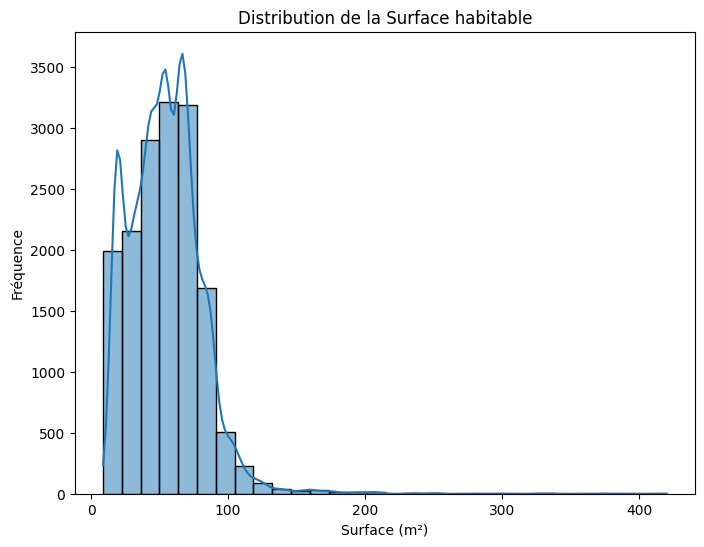

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['Surface_habitable_logement'], bins=30, kde=True)
plt.title('Distribution de la Surface habitable')
plt.xlabel('Surface (m²)')
plt.ylabel('Fréquence')
plt.show()

### 4 Analyse des Corrélations entre les Variables Explicatives

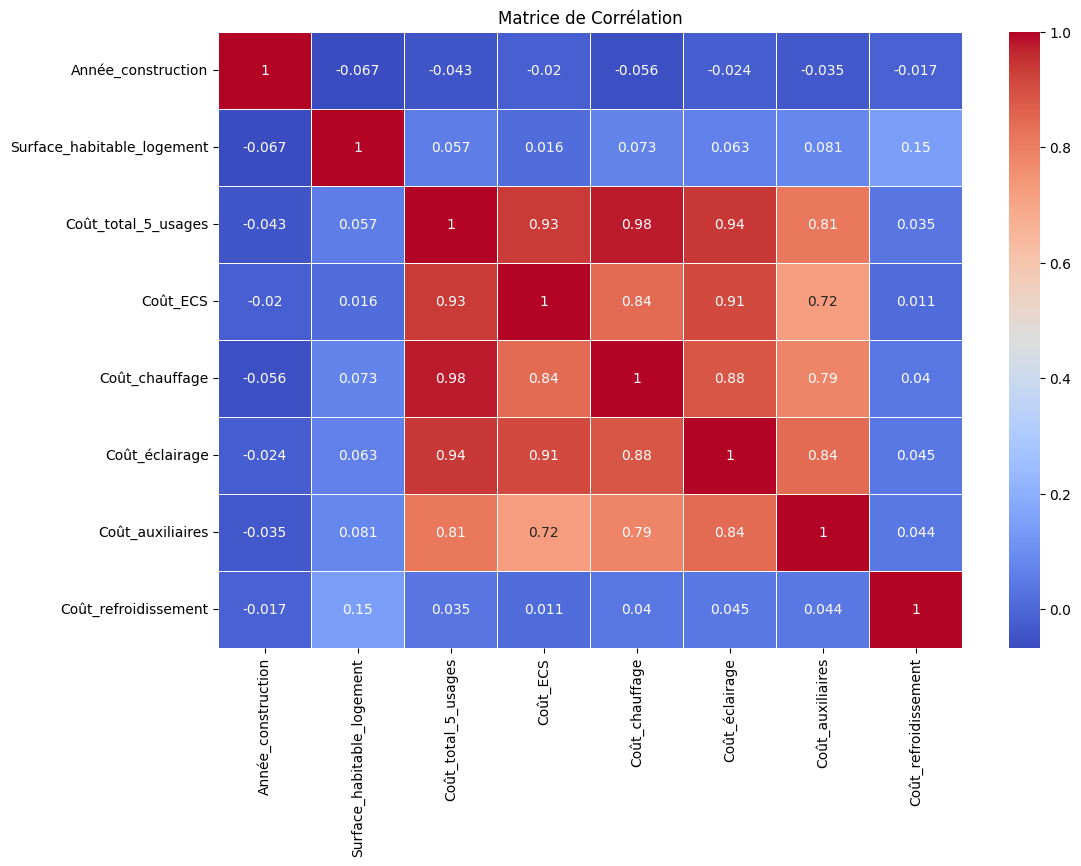

In [8]:
corr_matrix = df[ls_variables_explicatives[:-1]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

### 5 Analyse des liens entre les Variables Explicatives et la Variable Cible

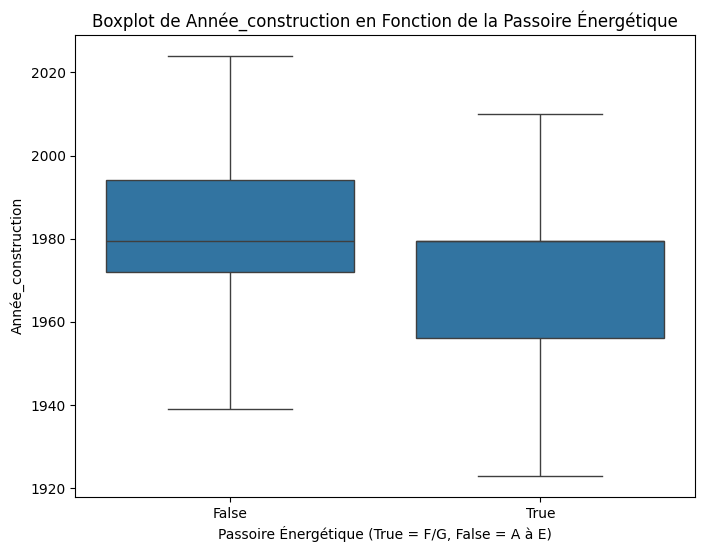

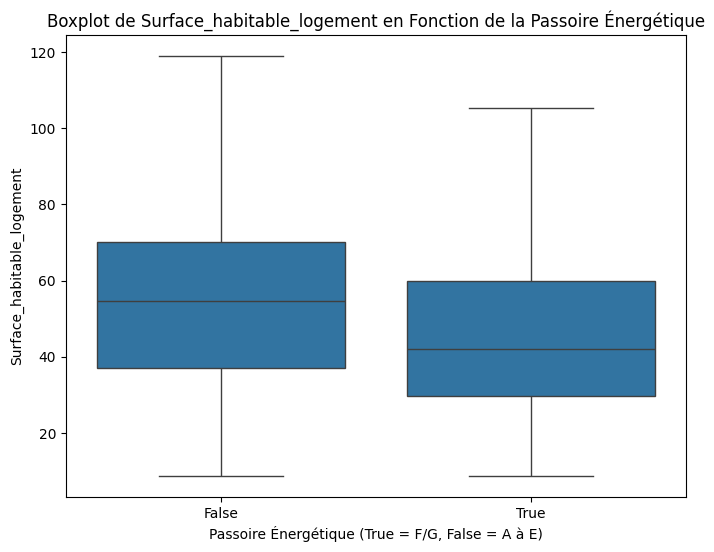

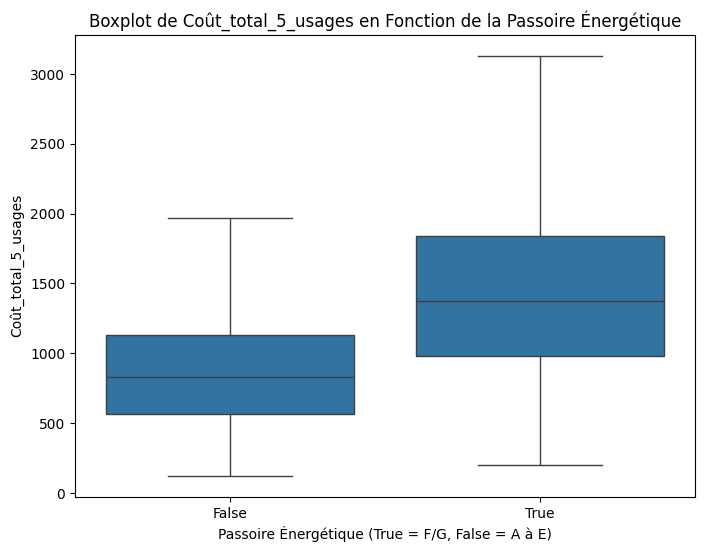

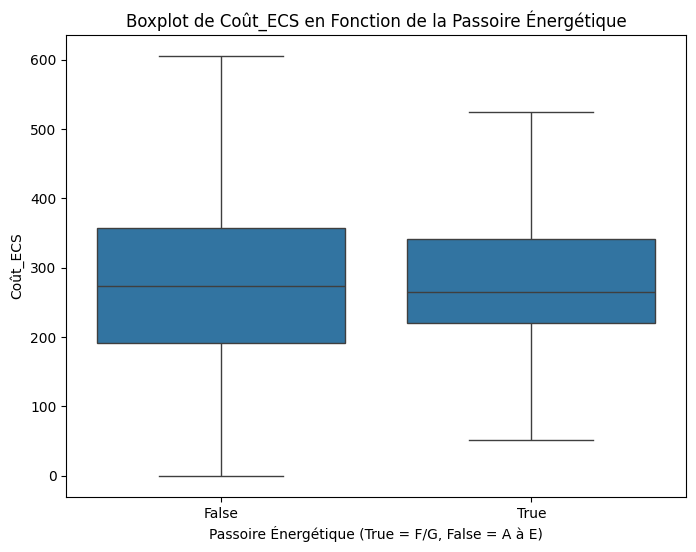

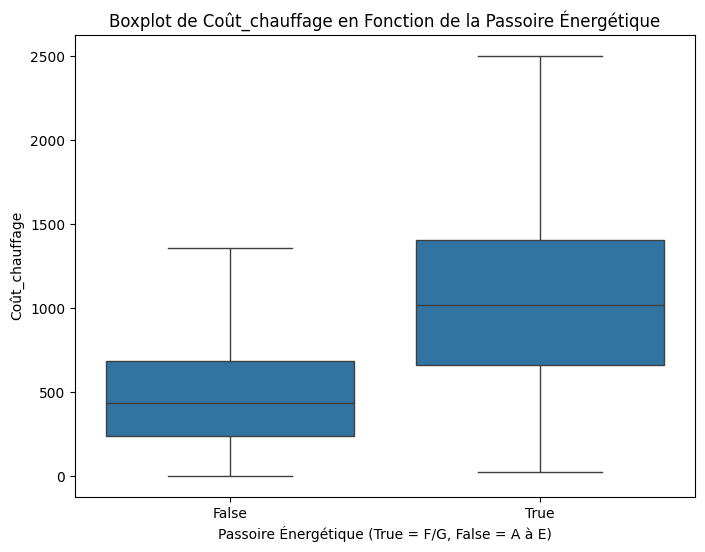

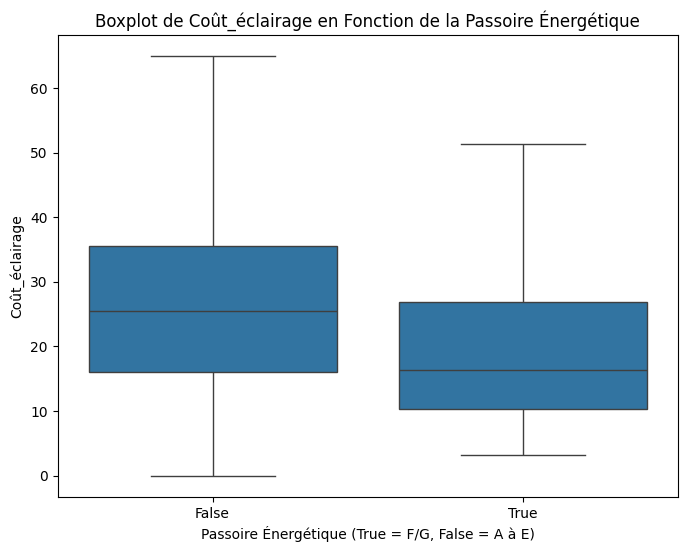

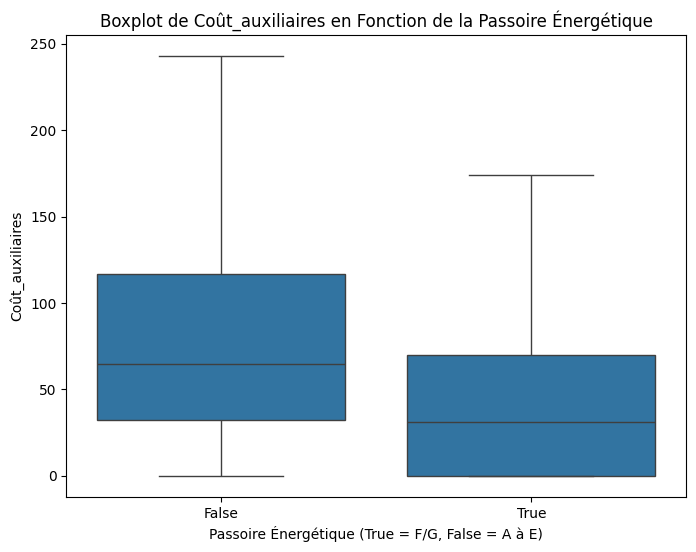

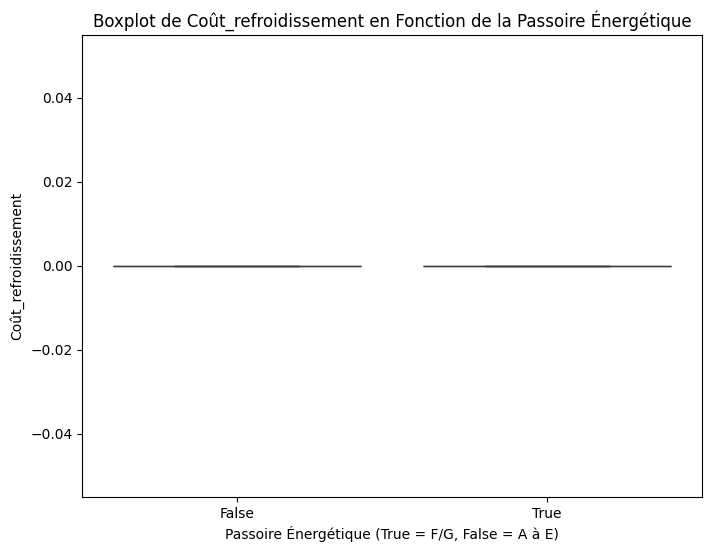

In [9]:
for col in ls_variables_explicatives[:-1]:
    plt.figure(figsize=(8, 6))

    sns.boxplot(x='passoire_energetique', y=col, data=df, showfliers= False)

    plt.title(f'Boxplot de {col} en Fonction de la Passoire Énergétique')

    plt.xlabel('Passoire Énergétique (True = F/G, False = A à E)')
    plt.ylabel(f'{col}')
    plt.show()

### 6 Encodage des variables catégorielles

In [10]:
df = df[ls_variables_explicatives + ['passoire_energetique']]
df = pd.get_dummies(df, columns=['Type_énergie_n°1'], drop_first=True)

## Echantillonnage

### 1 Créer un objet X avec les variables explicatives

In [11]:
X = df[df.columns.difference(['passoire_energetique'])]

### 2 Crée un objet Y avec la variable à expliquer

In [12]:
Y = df['passoire_energetique']

### 3 Scinder l'échantillon en train / test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = 0.30,
                                                   stratify = Y,
                                                   random_state = 42)

### 4 Répartition des classes dans y_train et y_test

In [14]:
Y_train.value_counts(normalize=True)
Y_test.value_counts(normalize=True)

passoire_energetique
False    0.903547
True     0.096453
Name: proportion, dtype: float64

### 5 Afficher un extrait de X_train et X_test

In [15]:
print(X_train.shape)
print(X_test.shape)
X_test.head()

(11248, 15)
(4821, 15)


,Année_construction,Coût_ECS,Coût_auxiliaires,Coût_chauffage,Coût_refroidissement,Coût_total_5_usages,Coût_éclairage,Surface_habitable_logement,Type_énergie_n°1_Bois – Granulés (pellets) ou briquettes,Type_énergie_n°1_Bois – Plaquettes forestières,Type_énergie_n°1_Fioul domestique,Type_énergie_n°1_GPL,Type_énergie_n°1_Gaz naturel,Type_énergie_n°1_Réseau de Chauffage urbain,Type_énergie_n°1_Électricité
3777,1959.000000,219.6,179.0,725.6,0.0,1159.3,35.1,65.0,False,False,False,False,False,True,False
9541,1979.510191,199.5,95.0,138.9,0.0,468.4,35.1,65.0,False,False,False,False,True,False,False
11913,2020.000000,189.6,36.7,210.0,0.0,468.3,32.1,59.5,False,False,False,False,False,True,False
5298,1948.000000,353.1,49.3,530.9,0.0,954.3,20.9,64.4,False,False,False,False,False,False,True
6080,1979.510191,258.1,38.7,250.2,0.0,557.9,10.8,30.0,False,False,False,False,False,False,True


## Arbre de décision

### 1 Lancer l'apprentissage du modèle sur l'échantillon d'entrainement

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_arbre = DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=100)
model_arbre = model_arbre.fit(X_train, Y_train)

### 2 Afficher l'arbre de décision

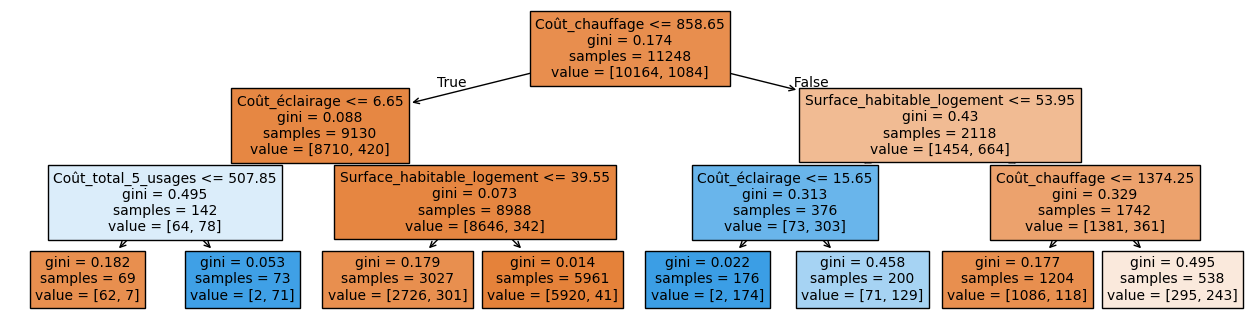

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,4))
plot_tree(model_arbre,feature_names=list(X.columns),filled=True,fontsize=10)
plt.show()

### 3 Prédire sur l'échantillon test

In [18]:
Y_pred = model_arbre.predict(X_test)
Y_pred

array([False, False, False, ..., False, False, False], shape=(4821,))

### 4 Afficher les probabilités d'appartenance aux classes

In [19]:
Y_pred_proba = model_arbre.predict_proba(X_test)
Y_pred_proba[0:10]

array([[0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.90056161, 0.09943839],
       [0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.02739726, 0.97260274],
       [0.99312196, 0.00687804],
       [0.54832714, 0.45167286]])

## Evaluation de modèle

### 1 Calculer la matrice de confusion

In [20]:
from sklearn.metrics import confusion_matrix
mc = pd.DataFrame(confusion_matrix(Y_test,Y_pred),
                  columns=['pred_0','pred_1'],
                  index=['obs_0','obs_1'])
mc

#ou

pd.crosstab(Y_test,Y_pred,colnames=['pred'],rownames=['obs'],margins=True)

pred,False,True,All
obs,,,
False,4326,30,4356
True,289,176,465
All,4615,206,4821


### 2 Calculer le taux de bonne prédiction

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.9338311553619582


### 3 Calculer le rappel et la précision

In [22]:
from sklearn.metrics import recall_score, precision_score
print('recall : ' +  str(recall_score(Y_test,Y_pred,average='binary',pos_label=0)))
print('precision : ' + str(precision_score(Y_test,Y_pred,average='binary',pos_label=0)))

recall : 0.9931129476584022
precision : 0.9373781148429036


### 4 Calculer le f1-score

In [23]:
from sklearn.metrics import f1_score
print('f1_score : ', str(f1_score(Y_test,Y_pred,average='binary',pos_label=0)))

f1_score :  0.9644409764797681


### 5 Calculer ces métriques avec l'approche macro non pondéré

In [24]:
print('recall : ' + str(recall_score(Y_test,Y_pred,average='macro')))
print('precision : ' + str(precision_score(Y_test,Y_pred,average='macro')))
print('f1_score : ' + str(f1_score(Y_test,Y_pred,average='macro')))

recall : 0.685803785657158
precision : 0.8958735234408692
f1_score : 0.7445155702070971


### 6 Calculer ces métriques avec l'approche macro pondéré

In [25]:
print('recall : ' + str(recall_score(Y_test,Y_pred,average='weighted')))
print('precision : ' + str(precision_score(Y_test,Y_pred,average='weighted')))
print('f1_score : ' + str(f1_score(Y_test,Y_pred,average='weighted')))

recall : 0.9338311553619582
precision : 0.9293716286359149
f1_score : 0.9220160381197632


## Validation croisée

In [26]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report

model_arbre_cv = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(model_arbre_cv, X_train, Y_train, cv=5, scoring='f1_macro')

print(f"Scores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

model_arbre_cv.fit(X_train,Y_train)

Y_pred_arbre_cv = model_arbre_cv.predict(X_test)

print(classification_report(Y_pred,Y_pred_arbre_cv))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(Y_test,Y_pred_arbre_cv)}")

Scores de validation croisée : [0.91110584 0.87095481 0.88112341 0.89779137 0.88286153]
Moyenne des scores de validation croisée : 0.8887673928377294
              precision    recall  f1-score   support

       False       0.99      0.94      0.96      4615
        True       0.38      0.84      0.52       206

    accuracy                           0.93      4821
   macro avg       0.68      0.89      0.74      4821
weighted avg       0.97      0.93      0.95      4821

Accuracy sur l'ensemble de test : 0.9645301804604853


## Optimisation des paramètres

### 1 Configurer les fenêtres de recherches

In [27]:
import numpy as np

parameters = {'max_depth' : np.arange(start = 1, stop = 10, step = 1) ,
              'min_samples_leaf' : np.arange(start = 5, stop = 250, step = 50),
              'min_samples_split' : np.arange(start = 10, stop = 500, step = 50)}

total_combinaisons = (
    len(parameters['max_depth']) *
    len(parameters['min_samples_leaf']) * 
    len(parameters['min_samples_split'])
)

print(f"Nombre total de modèles à tester: {total_combinaisons}")

Nombre total de modèles à tester: 450


### 2 Apprentissage avec Grid Search

In [28]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
model_arbre_grid = DecisionTreeClassifier()
score = make_scorer(f1_score, pos_label=0)
model_arbre_grid = GridSearchCV(model_arbre_grid, parameters, scoring=score, verbose=2, cv=5)
model_arbre_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=110; total time=   0.0s
[CV] END max_depth=1, 

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': array([1, 2, ..., 6, 7, 8, 9]), 'min_samples_leaf': array([ 5, ...05, 155, 205]), 'min_samples_split': array([ 10, ...60, 410, 460])}"
,scoring,"make_scorer(f..., pos_label=0)"
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


### 3 Afficher le meilleur modèle

In [29]:
print("Voici les paramètres du meilleure modèle :" + str(model_arbre_grid.best_estimator_))
print("Voici le " + str(model_arbre_grid.scorer_) + " du meilleure modèle : " + str(model_arbre_grid.best_score_))

Voici les paramètres du meilleure modèle :DecisionTreeClassifier(max_depth=np.int64(8), min_samples_leaf=np.int64(5),
                       min_samples_split=np.int64(10))
Voici le make_scorer(f1_score, response_method='predict', pos_label=0) du meilleure modèle : 0.9793966944905985


### 4 Prédire avec la meilleure combinaison de paramètres

In [30]:
Y_pred_arbre_grid = model_arbre_grid.predict(X_test)

### 5 Evaluer le modèle avec la meilleure combinaison de paramètres

In [31]:
print(classification_report(Y_test,Y_pred_arbre_grid))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(Y_test,Y_pred_arbre_grid)}")
print('recall : ' + str(recall_score(Y_test,Y_pred,average='binary',pos_label=0)))
print('precision : ' + str(precision_score(Y_test,Y_pred,average='binary',pos_label=0)))
print('f1_score : ' + str(f1_score(Y_test,Y_pred,average='binary',pos_label=0)))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98      4356
        True       0.83      0.76      0.79       465

    accuracy                           0.96      4821
   macro avg       0.90      0.87      0.89      4821
weighted avg       0.96      0.96      0.96      4821

Accuracy sur l'ensemble de test : 0.9618336444721012
recall : 0.9931129476584022
precision : 0.9373781148429036
f1_score : 0.9644409764797681


## Courbe ROC pour comparer des modèles

### 1 Obtener les probabilités de prédiction des modèles

In [32]:
Y_proba_cv = model_arbre_cv.predict_proba(X_test)[:,1]
Y_proba_grid = model_arbre_grid.predict_proba(X_test)[:,1]

### 2 Calculer les Valeurs de la Courbe ROC

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, _ = roc_curve(Y_test,Y_proba_cv)
fpr2, tpr2, _ = roc_curve(Y_test,Y_proba_grid)

auc1 = roc_auc_score(Y_test,Y_proba_cv)
auc2 = roc_auc_score(Y_test, Y_proba_grid)

### 3 Tracer les Courbes ROC

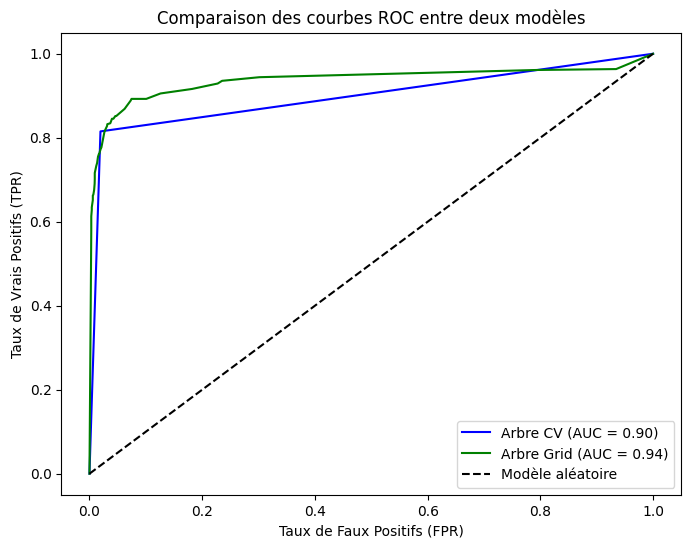

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1,label=f'Arbre CV (AUC = {auc1:.2f})', color='blue')
plt.plot(fpr2,tpr2,label=f'Arbre Grid (AUC = {auc2:.2f})', color='green')

plt.plot([0,1],[0,1], 'k--', label='Modèle aléatoire')

plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Comparaison des courbes ROC entre deux modèles')
plt.legend(loc='lower right')

plt.show()

## D'autres méthodes

### KNN

#### 1 Modéliser avec la méthode des K plus proches voisins

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)

Y_pred_knn = knn_model.predict(X_test)
print('f1_score : ' + str(f1_score(Y_test,Y_pred_knn,average='binary',pos_label=1)))

f1_score : 0.6491428571428571


### Régression logistique

#### 1 Modéliser avec la méthode de régression logistique

In [36]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, Y_train)
Y_pred_reg = reg_log_model.predict(X_test)

print('f1_score : ' + str(f1_score(Y_test,Y_pred_reg,average='binary',pos_label=1)))

f1_score : 0.49293563579277866


c:\Users\cpecnik\Documents\COURSES\PYTHON\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2 Afficher les probabilités d'appartenance aux classes

In [37]:
reg_log_model.predict_proba(X_test)[0:10]

array([[9.89600683e-01, 1.03993174e-02],
       [9.95841700e-01, 4.15829961e-03],
       [9.86612509e-01, 1.33874910e-02],
       [9.47556287e-01, 5.24437132e-02],
       [9.06331010e-01, 9.36689897e-02],
       [9.95364128e-01, 4.63587211e-03],
       [9.99164431e-01, 8.35569166e-04],
       [7.96870394e-01, 2.03129606e-01],
       [9.96564976e-01, 3.43502406e-03],
       [1.16117295e-01, 8.83882705e-01]])

#### 3 Afficher les coefficients du modèle

In [38]:
coef = pd.DataFrame(reg_log_model.coef_[0,], index = X_train.columns, columns=['Coef'])
coef.loc['Constante'] = reg_log_model.intercept_
coef

,Coef
Année_construction,-0.000536
Coût_ECS,0.010134
Coût_auxiliaires,-0.000042
Coût_chauffage,0.014479
Coût_refroidissement,0.003776
Coût_total_5_usages,-0.011262
Coût_éclairage,-0.056025
Surface_habitable_logement,-0.018549
Type_énergie_n°1_Bois – Granulés (pellets) ou briquettes,-0.000004
Type_énergie_n°1_Bois – Plaquettes forestières,-0.000001


### Random Forest

#### 1 Modéliser avec la méthode des forêts aléatoires

In [39]:
from sklearn.ensemble  import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_model = rf_clf.fit(X_train,Y_train)
Y_pred_rf = rf_model.predict(X_test)

print('f1_score : ' + str(f1_score(Y_test,Y_pred_rf,average='binary',pos_label=1)))

pd.crosstab(Y_test,Y_pred,colnames=['pred'], rownames=['obs'], margins=True)

f1_score : 0.8481308411214953


pred,False,True,All
obs,,,
False,4326,30,4356
True,289,176,465
All,4615,206,4821


#### 2 Analyser les variables les plus importantes

In [40]:
pd.DataFrame(rf_model.feature_importances_,
             index=X_train.columns.to_list(),
             columns=['Importances']).sort_values(by = 'Importances', ascending=False)

,Importances
Coût_chauffage,2.321521e-01
Coût_total_5_usages,1.921275e-01
Coût_éclairage,1.741053e-01
Surface_habitable_logement,1.535342e-01
Coût_auxiliaires,8.735095e-02
Coût_ECS,7.809206e-02
Année_construction,4.658787e-02
Type_énergie_n°1_Électricité,1.056161e-02
Type_énergie_n°1_Gaz naturel,7.997648e-03
Type_énergie_n°1_Réseau de Chauffage urbain,7.340734e-03


### Aller plus loin avec SMOTE pour ré équilibrer les classes

#### 1 Avec la méthode SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, Y_train_smote = oversample.fit_resample(X_train,Y_train)

#### 2 Avec la méthode BorderlineSMOTE

In [42]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, Y_train_smote = oversample.fit_resample(X_train,Y_train)

### Aller plus loin avec SHAP pour interpréter ses modèles

#### 2 Calculer les valeurs SHAP

In [43]:
import shap

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

c:\Users\cpecnik\Documents\COURSES\PYTHON\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 3 Visualiser les résultats

In [44]:
shap.initjs()
# shap.force_plot(explainer.expected_value, 
#                 shap_values[0], 
#                 X_test.iloc[0],
#                 )

shap.plots.force(explainer.expected_value[0], shap_values[0])

#### 4 Visualiser l'importance des variables pour tous le modèle

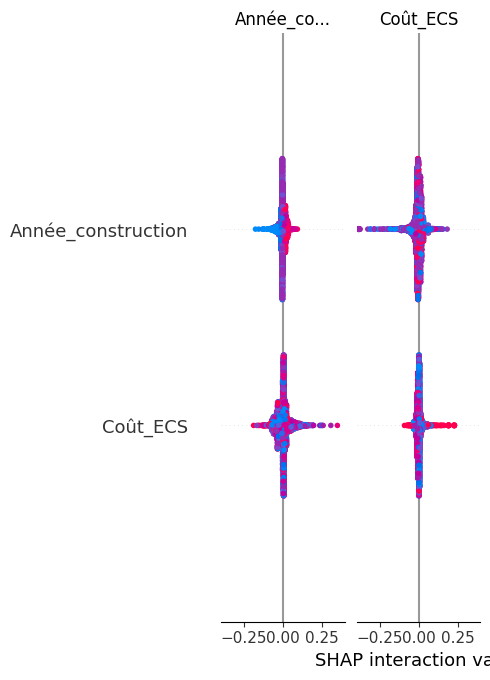

In [45]:
shap.summary_plot(shap_values, X_test)